In [1]:
#importing necessary liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading dataset
dataset = pd.read_csv('data/used_cars_data.csv')

In [3]:
dataset.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
dataset.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [5]:
dataset.shape

(7253, 14)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


* Columns Mileage, Engine, Power, Seats, New_price and Price has missing values.

In [7]:
#number of missing values
dataset.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [8]:
#percent of missing values
(dataset.isnull().sum())/len(dataset)*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

In [9]:
#imputing miising values
dataset.loc[dataset['Mileage']==0.0, 'Mileage']=np.nan
dataset['Mileage'].isnull().sum()

2

In [35]:
dataset['Mileage'].fillna(value=np.mean(dataset['Mileage']), inplace=True)
dataset['Mileage'].isnull().sum()

0

In [11]:
#data reduction
dataset = dataset.drop(['S.No.'], axis=1)
dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [13]:
#feature engineering
from datetime import date
dataset['Car_age'] = date.today().year - dataset['Year']
dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,13
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,8
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,12
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,11
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,10


In [14]:
#creating new colums Brand and Model form column 'Name'
dataset['Brand'] = dataset.Name.str.split().str.get(0)
dataset['Model'] = dataset.Name.str.split().str.get(1) + ' ' + dataset.Name.str.split().str.get(2)

dataset[['Name', 'Brand', 'Model']].head()

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,Wagon R
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta 1.6
2,Honda Jazz V,Honda,Jazz V
3,Maruti Ertiga VDI,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4 New


In [15]:
#data cleaning
print(dataset.Brand.unique())
print(dataset.Brand.nunique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']
33


In [16]:
searchfor = ['Isuzu', 'ISUZU', 'Mini', 'Land']
dataset[dataset.Brand.str.contains('|'.join(searchfor))].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,27.00,9,Land,Rover Range
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,17.50,11,Land,Rover Freelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.6 kmpl,1998 CC,112 bhp,5.0,NaN,23.00,6,Mini,Countryman Cooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,55.76,5,Land,Rover Range
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82 kmpl,1998 CC,189.08 bhp,4.0,44.28 Lakh,35.67,6,Mini,Cooper Convertible


In [17]:
dataset['Brand'].replace({'ISUZU': 'Isuzu',
                      'Mini': 'Mini-Cooper',
                      'Land': 'Land-Rover'}, inplace=True)

In [18]:
dataset[dataset.Brand.str.contains('|'.join(searchfor))].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,27.00,9,Land-Rover,Rover Range
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,17.50,11,Land-Rover,Rover Freelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.6 kmpl,1998 CC,112 bhp,5.0,NaN,23.00,6,Mini-Cooper,Countryman Cooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,55.76,5,Land-Rover,Rover Range
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82 kmpl,1998 CC,189.08 bhp,4.0,44.28 Lakh,35.67,6,Mini-Cooper,Cooper Convertible


In [19]:
#removing units from some features
dataset['Mileage'] = dataset['Mileage'].str.split().str.get(0).astype(float)
dataset['Engine'] = dataset['Engine'].str.split().str.get(0).astype(float)
dataset['Power'] = dataset['Power'].str.split().str.get(0)
dataset['New_Price'] = dataset['New_Price'].str.split().str.get(0).astype(float)

dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,13,Maruti,Wagon R
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,NaN,12.50,8,Hyundai,Creta 1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7,5.0,8.61,4.50,12,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8,5.0,NaN,17.74,10,Audi,A4 New


In [20]:
dataset['Power'] = dataset['Power'].replace(regex='null', value= np.nan)
dataset['Power'] = dataset['Power'].astype(float)

## Exploratory Data Analysis

In [21]:
#statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.00,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.00,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.10,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.00,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.10,616.00
Seats,7200.0,5.279722,0.811660,0.00,5.000,5.00,5.00,10.00
New_Price,1006.0,19.894324,19.813947,1.00,7.635,11.27,23.64,99.92
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.95,160.00
Car_age,7253.0,9.634634,3.254421,4.00,7.000,9.00,12.00,27.00


* Years range from 1996 - 2019 means age of cars is 4 to 27 year old.
* Average km drive is ~58k km. Max value of km seems to be an outlier.
* Min value of mileage and seats is 0.00 which looks like a data enty issue.
* Engine, price and power data is right-skewed and have oultiers.

In [22]:
#seperate numerical and categorical data

cat_cols = dataset.select_dtypes(include=['object']).columns
num_cols = dataset.select_dtypes(include=np.number).columns.tolist()

In [23]:
print("Categorical Variables:")
cat_cols

Categorical Variables:


Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model'],
      dtype='object')

In [24]:
print("Numerical Variables:")
num_cols

Numerical Variables:


['Year',
 'Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'New_Price',
 'Price',
 'Car_age']

* ### Univariate Analysis

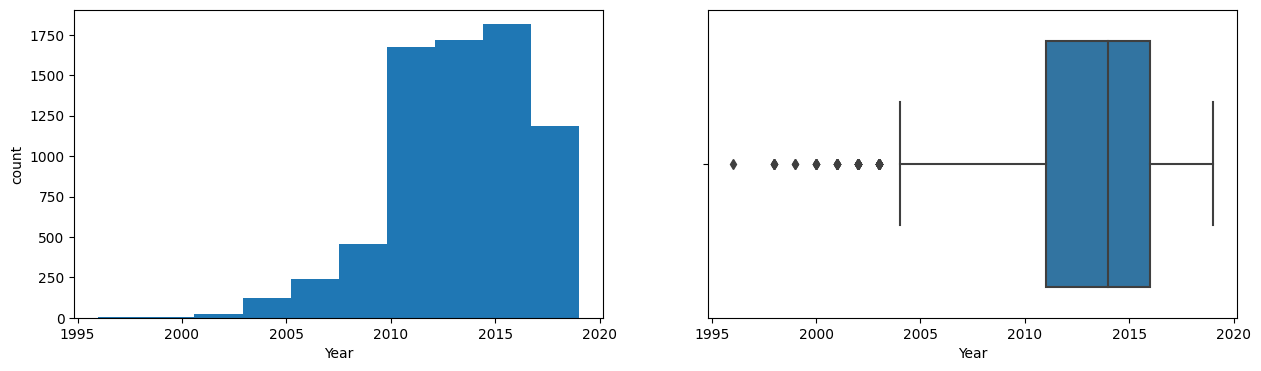

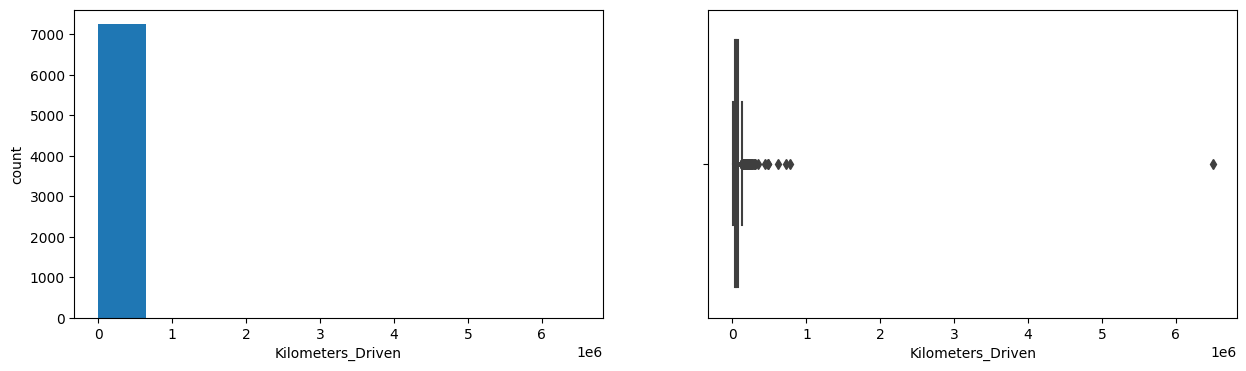

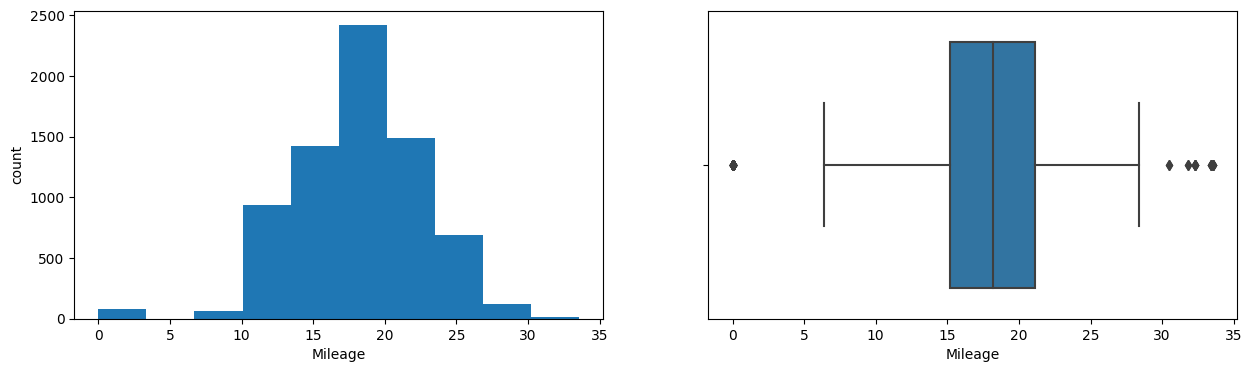

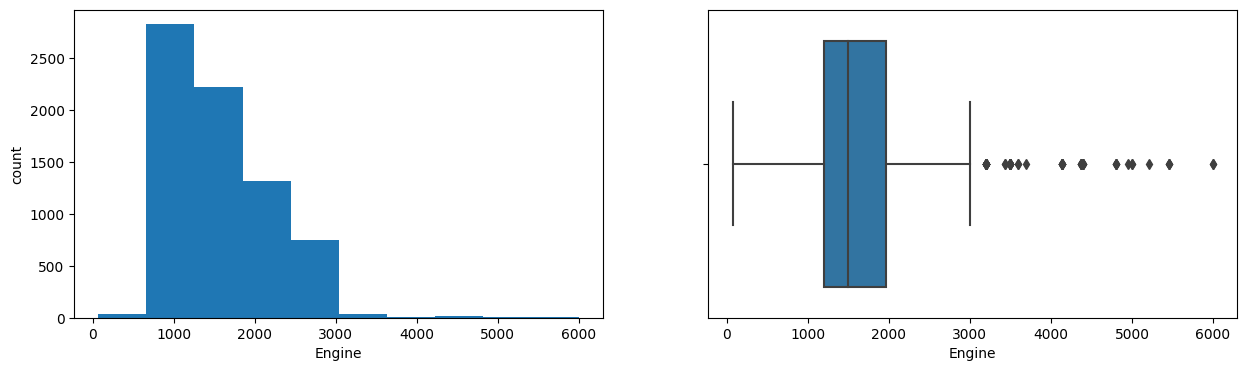

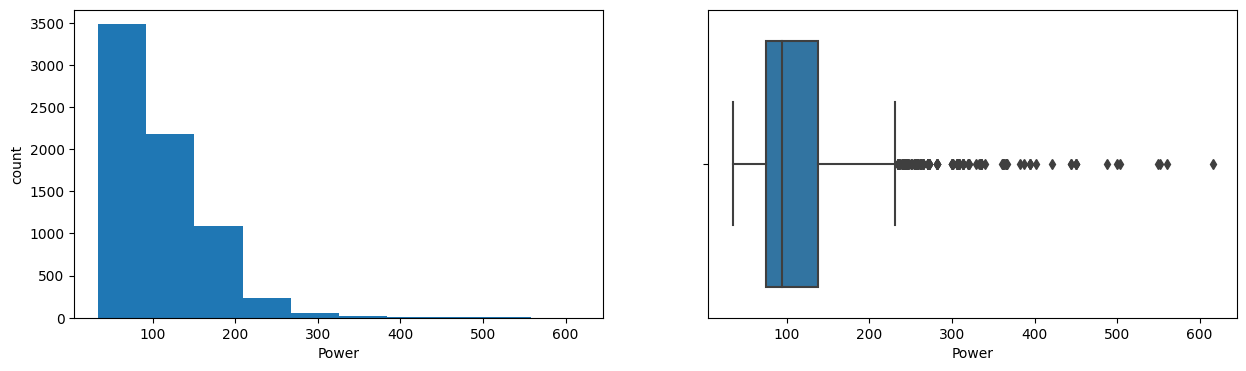

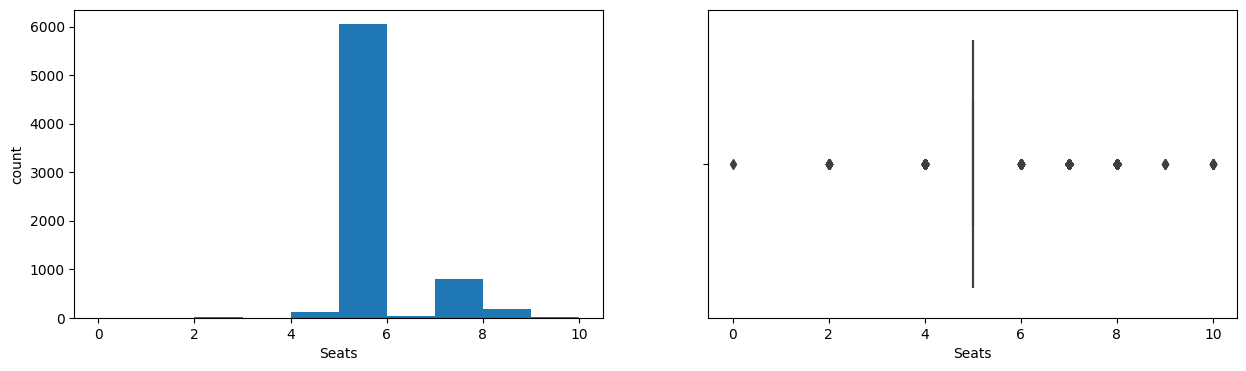

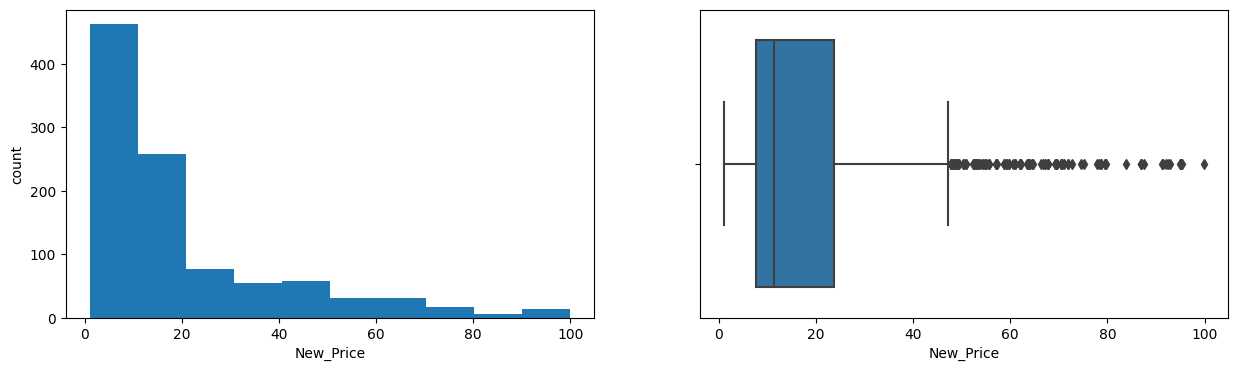

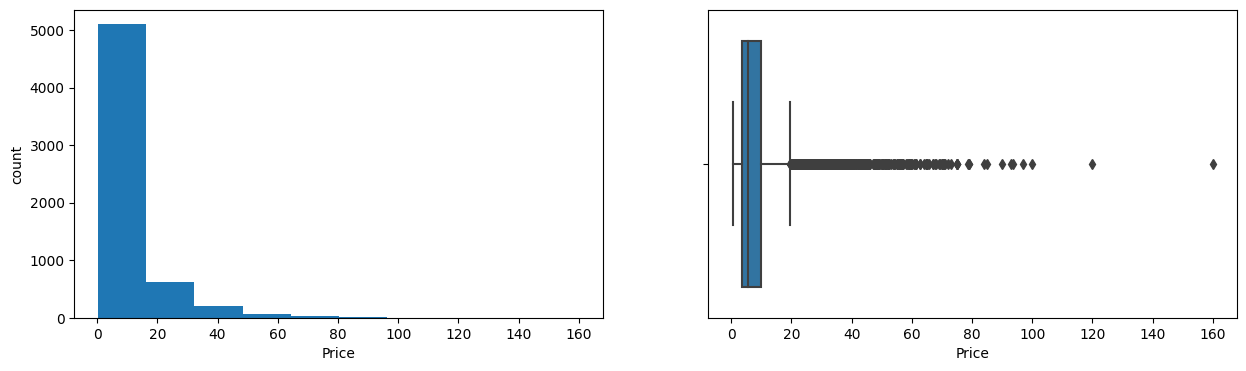

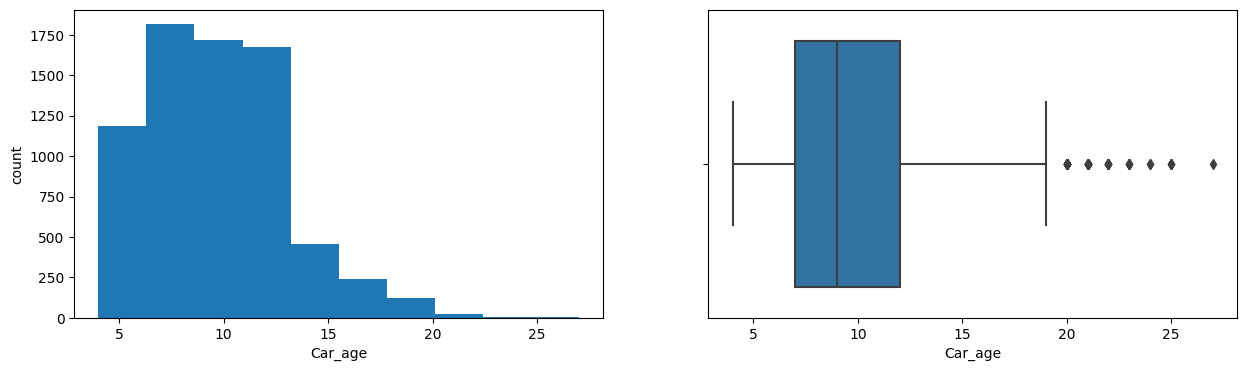

In [25]:
#numerical variables
for col in num_cols:
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    dataset[col].hist(grid=False)
    plt.xlabel(dataset[col].name)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataset[col])

* Year is left skewed and has outliers on lower side.
* Kilometer_driven data is right skewed.
* Mileage is normally distributed.
* Engine, power, price and Car_age are right skewed.
* Most of the cars are 5 seaters.

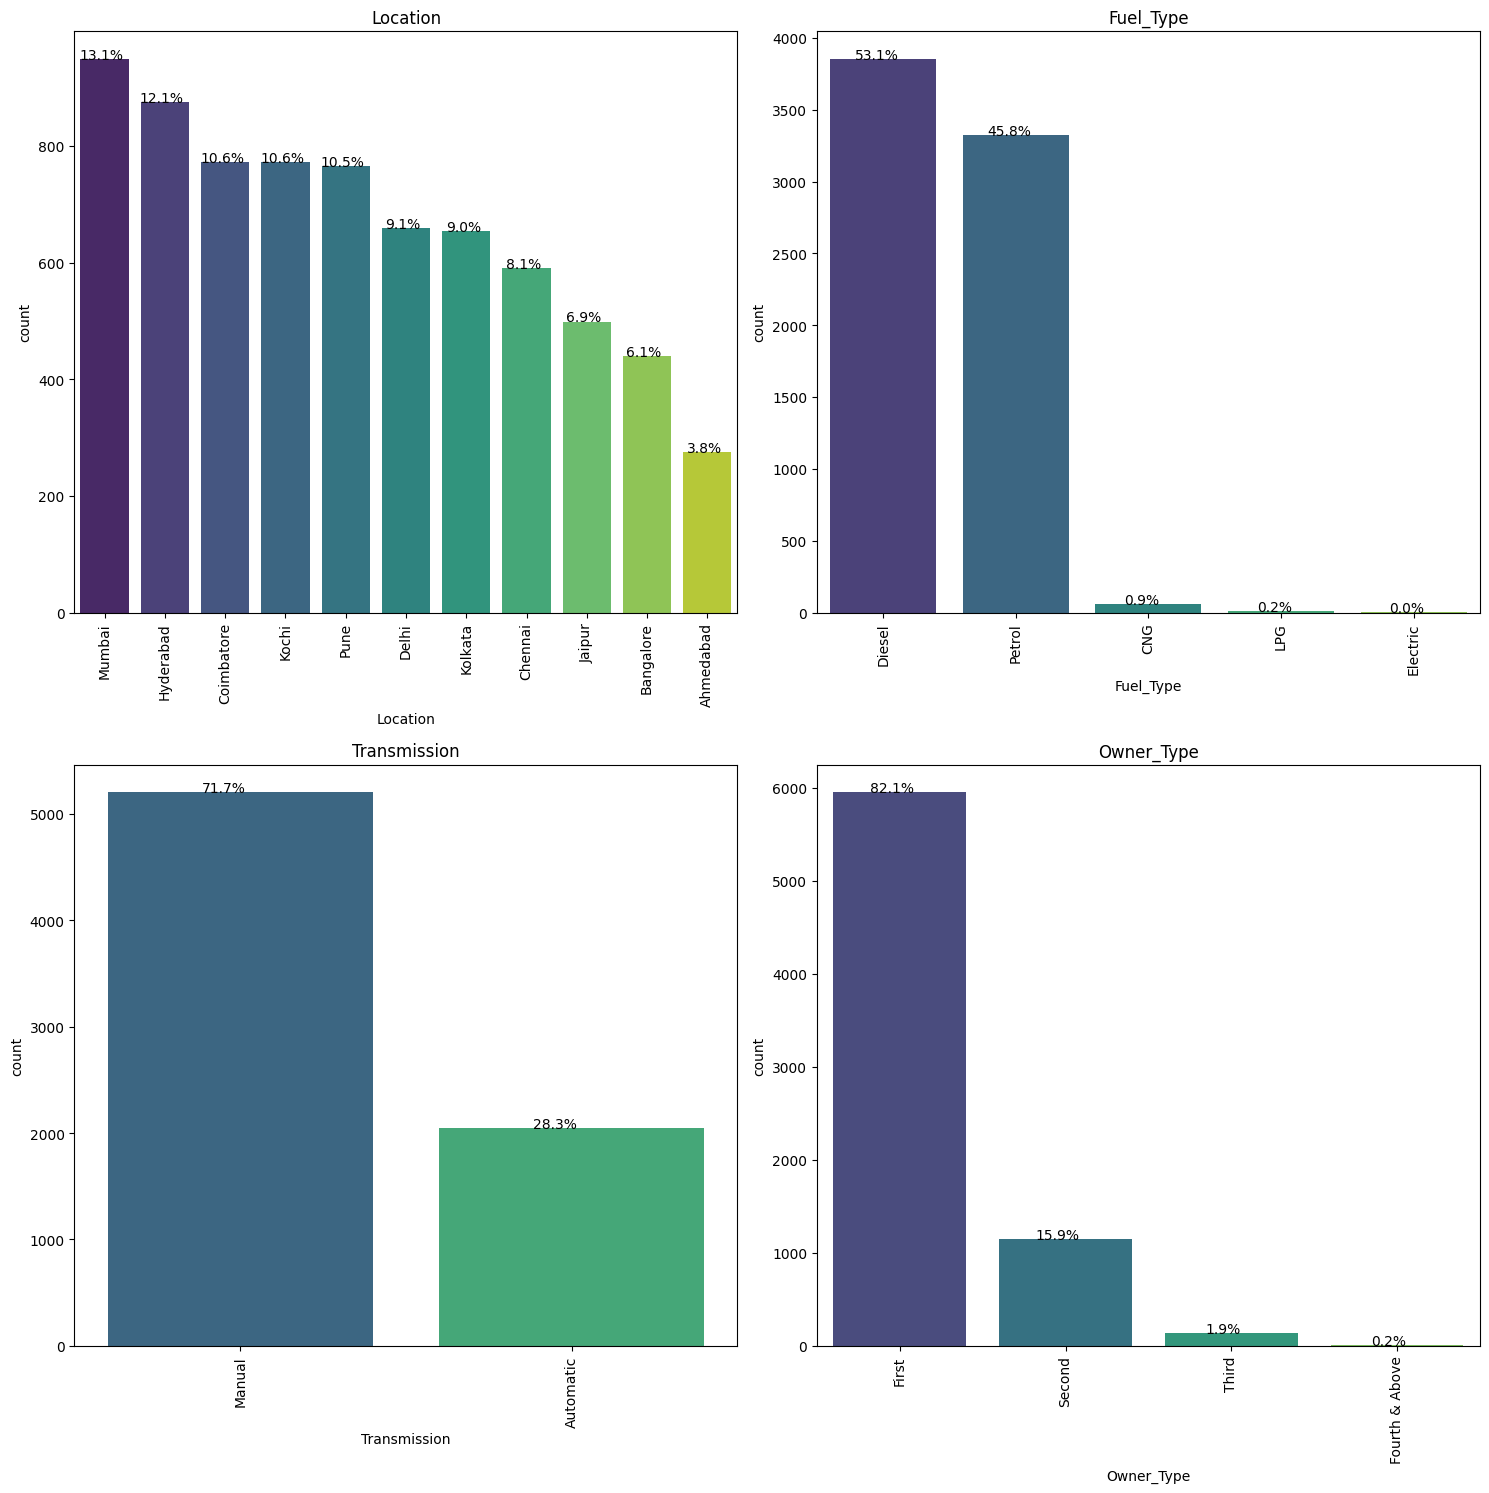

In [26]:
cat_cols = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']
plt.figure(figsize=(15,21))

for i, variable in enumerate(cat_cols):
                     plt.subplot(3,2,i+1)
                     order = dataset[variable].value_counts().index    
                     ax=sns.countplot(x=dataset[variable], data=dataset , order=order ,palette='viridis')
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(dataset[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.xticks(rotation=90)
                     plt.tight_layout()
                     plt.title(variable)

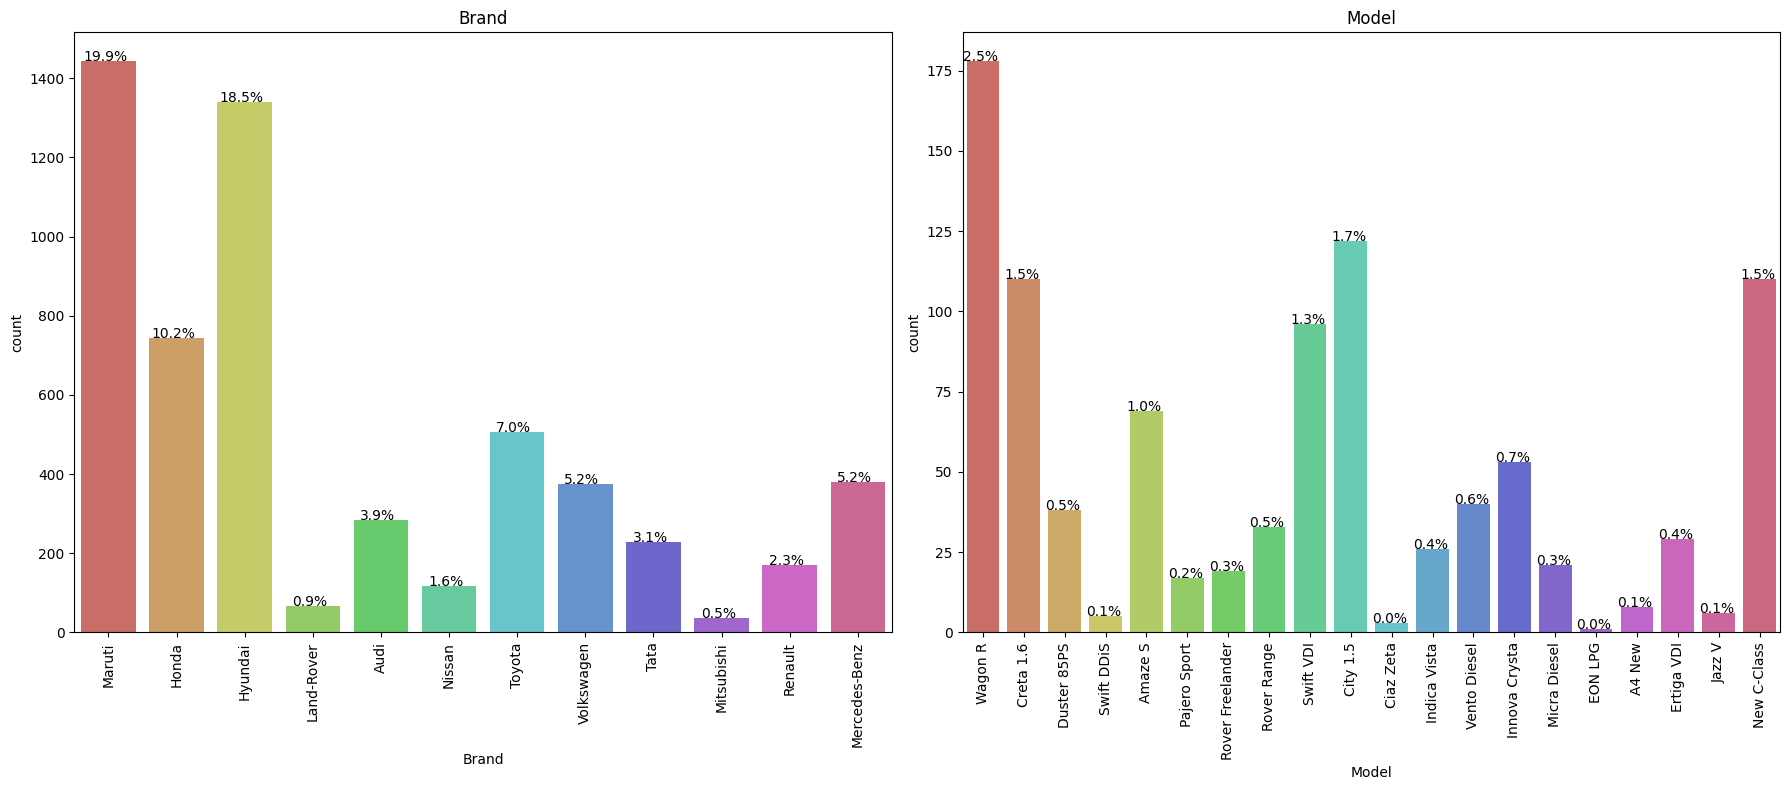

In [27]:
brand_model = ['Brand', 'Model']

cat_cols = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']
plt.figure(figsize=(18,8))

for i, variable in enumerate(brand_model):
                     plt.subplot(1,2,i+1)
                     order = dataset[variable].head(20).value_counts().index    
                     ax=sns.countplot(x=dataset[variable], data=dataset , order=order ,palette='hls')
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(dataset[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.xticks(rotation=90)
                     plt.tight_layout()
                     plt.title(variable)

* Mumbai is where most number of cars are sold and Ahmedabad is the least
* 53% of cars use Diesel as fuel
* 73% of cars have manual transmission.
* 82% care are first owned cars
* About 20% cars belong to brand Maruti followed by Hundai with 18.5%
* Wagon R is leading model

### Data Transformation

We can perfomrm transformation on skewed data

In [28]:
#log transformation
def log_transform(data, cols):
    for colname in cols:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

In [29]:
log_transform(dataset, ['Kilometers_Driven', 'Price'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7253 non-null   object 
 1   Location               7253 non-null   object 
 2   Year                   7253 non-null   int64  
 3   Kilometers_Driven      7253 non-null   int64  
 4   Fuel_Type              7253 non-null   object 
 5   Transmission           7253 non-null   object 
 6   Owner_Type             7253 non-null   object 
 7   Mileage                7251 non-null   float64
 8   Engine                 7207 non-null   float64
 9   Power                  7078 non-null   float64
 10  Seats                  7200 non-null   float64
 11  New_Price              1006 non-null   float64
 12  Price                  6019 non-null   float64
 13  Car_age                7253 non-null   int64  
 14  Brand                  7253 non-null   object 
 15  Mode

<AxesSubplot: xlabel='Kilometers_Driven_log', ylabel='Density'>

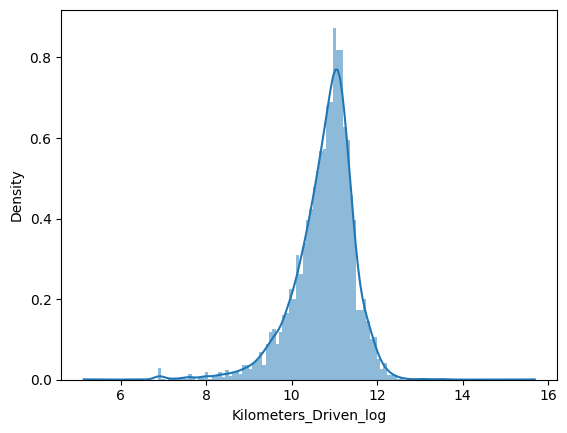

In [30]:
#log transformed Kilometers_Driven
sns.histplot(dataset['Kilometers_Driven_log'], label='Kilometers_Driven_log', kde=True, stat='density', linewidth=0)

<AxesSubplot: xlabel='Price_log', ylabel='Density'>

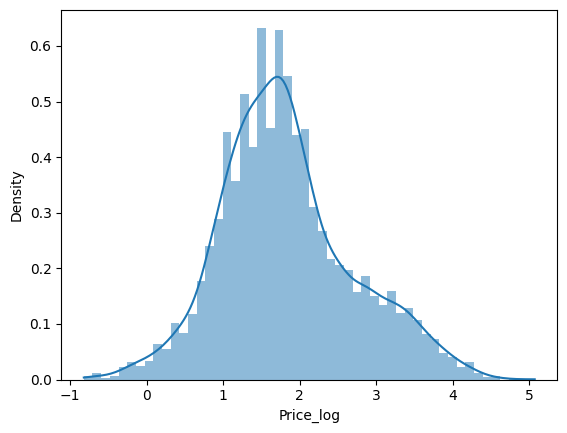

In [31]:
#log transformed Price
sns.histplot(dataset['Price_log'], label='Price_log', kde=True, stat='density', linewidth=0)

* ### Bivariate Analysis

<Figure size 1300x1700 with 0 Axes>

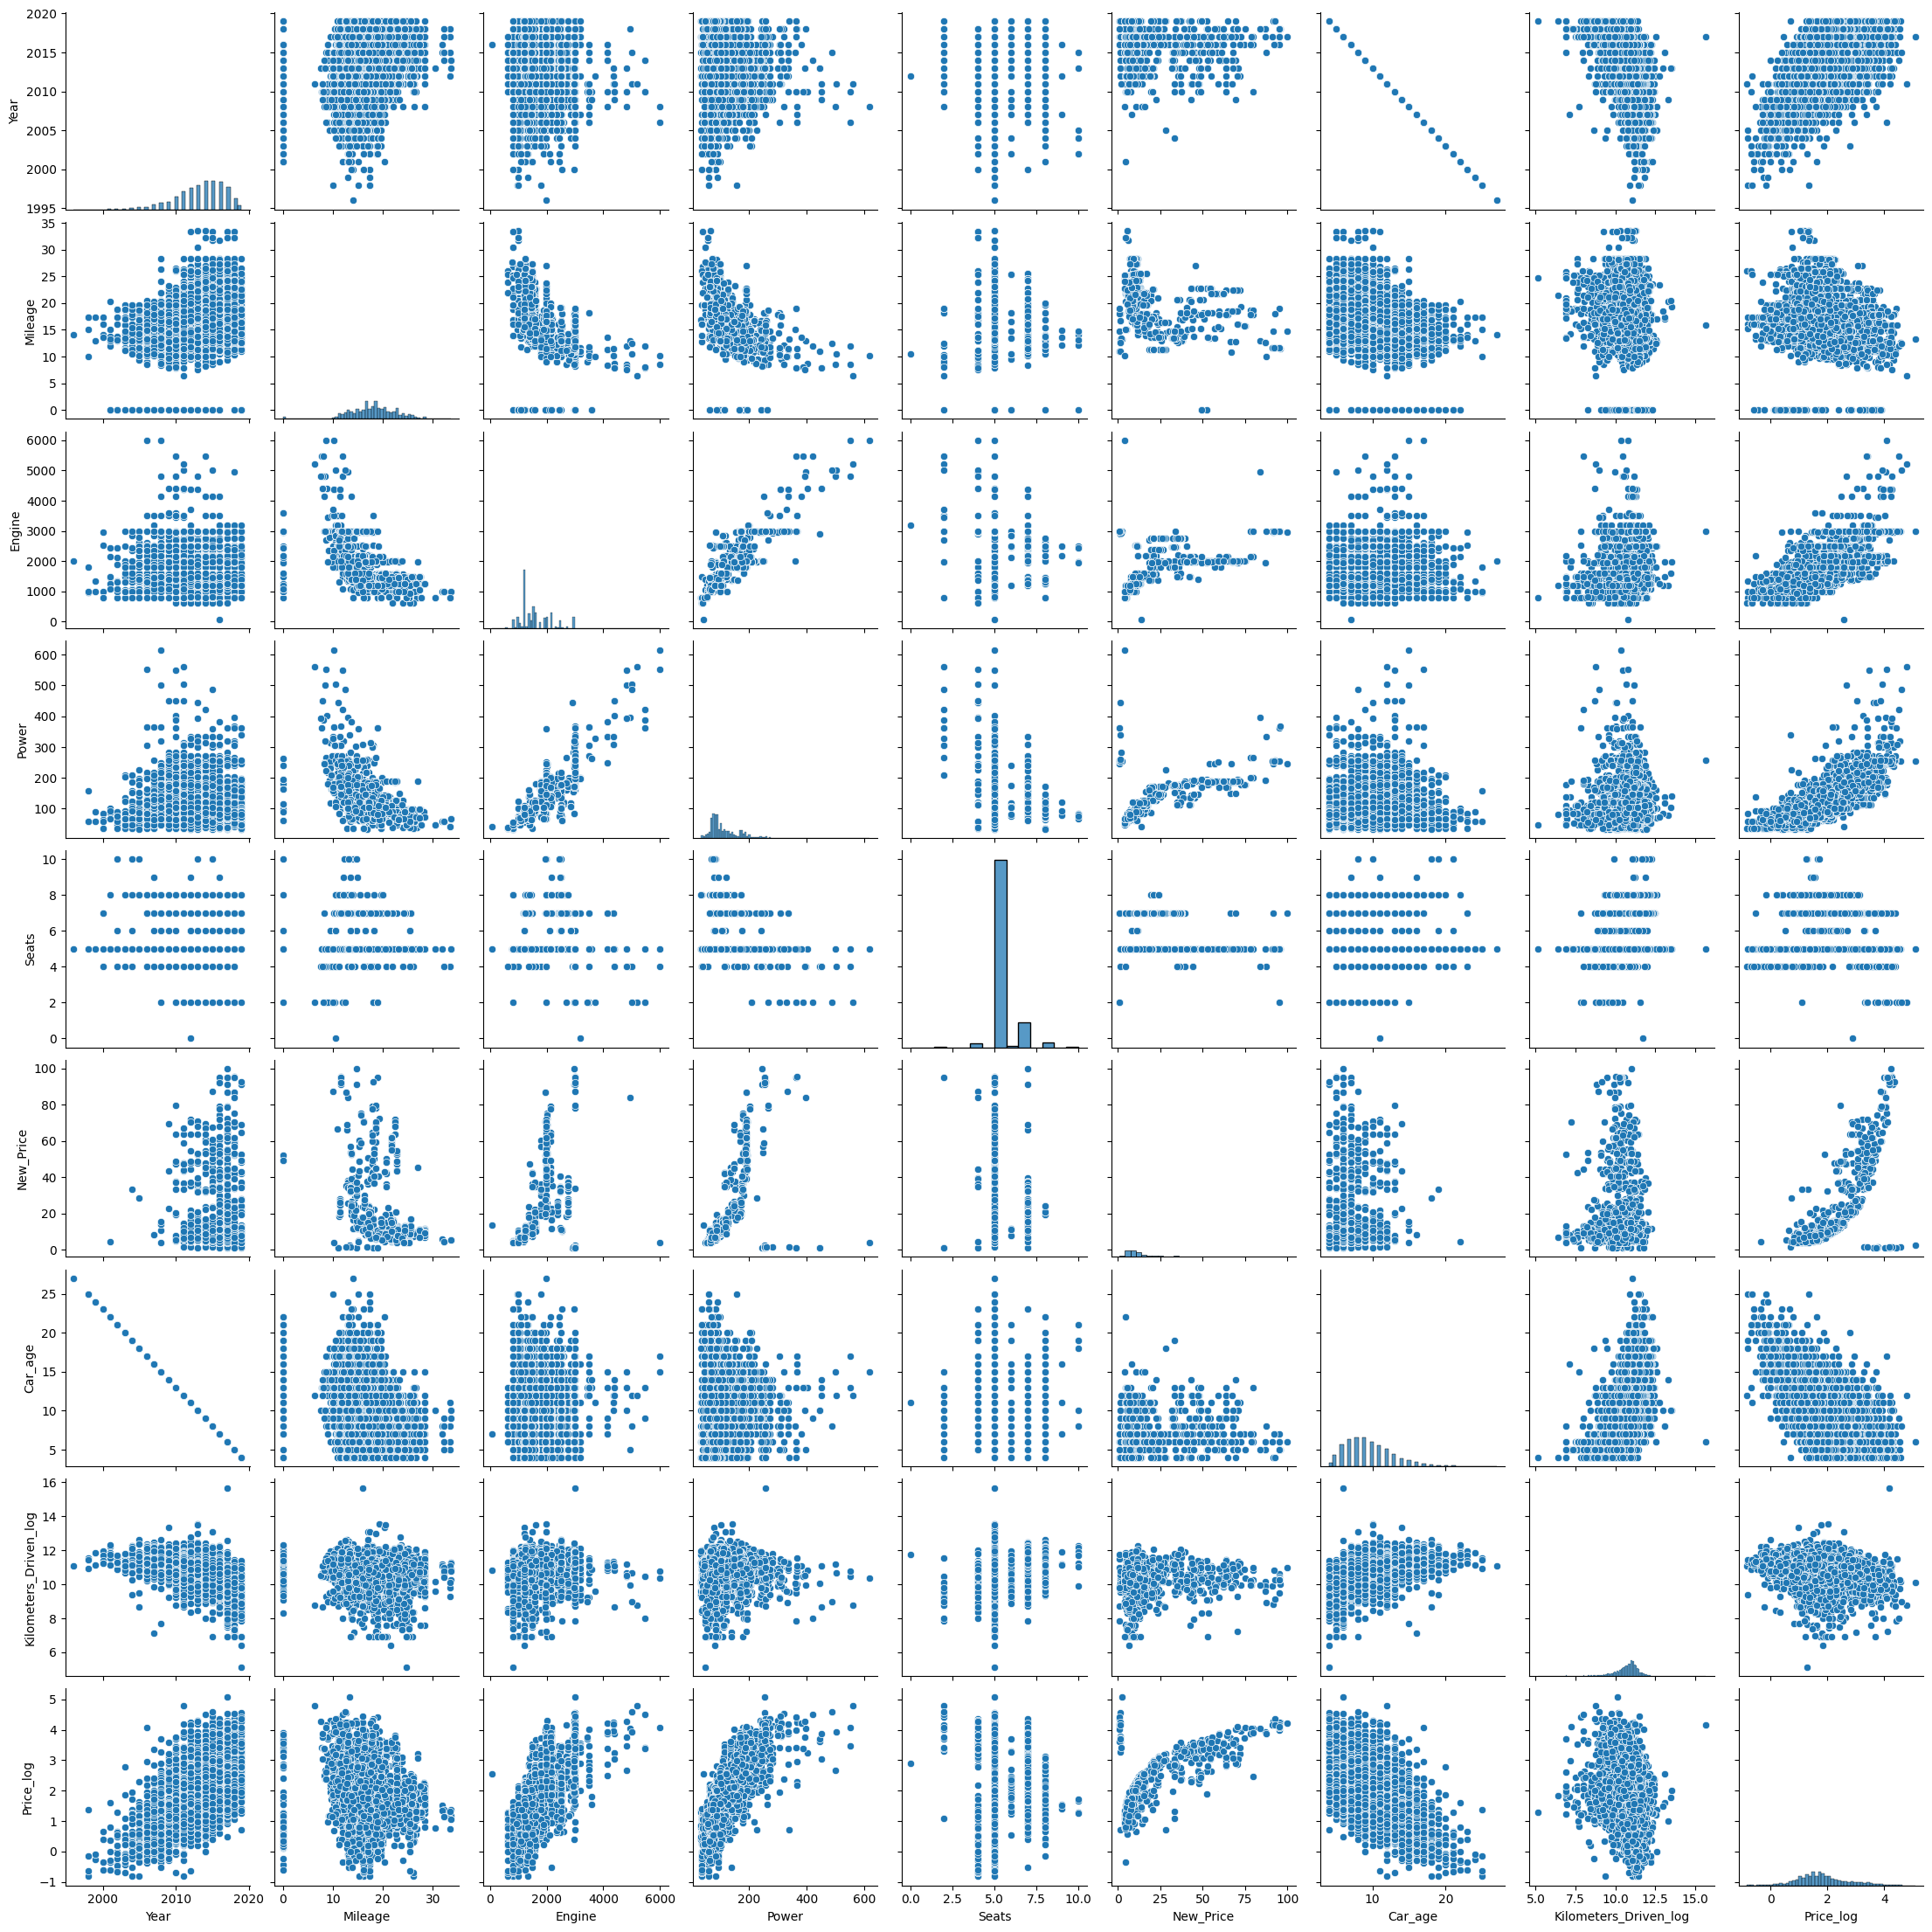

In [32]:
#pairplot for relationship between numerical variables
plt.figure(figsize=(13, 17))
sns.pairplot(data=dataset.drop(['Kilometers_Driven', 'Price'], axis=1))

* Year has positive correlation with price
* Cars made in recent year has greater price
* Mileage has negative correlation with engine and power
* As engine and power increase the price also increases

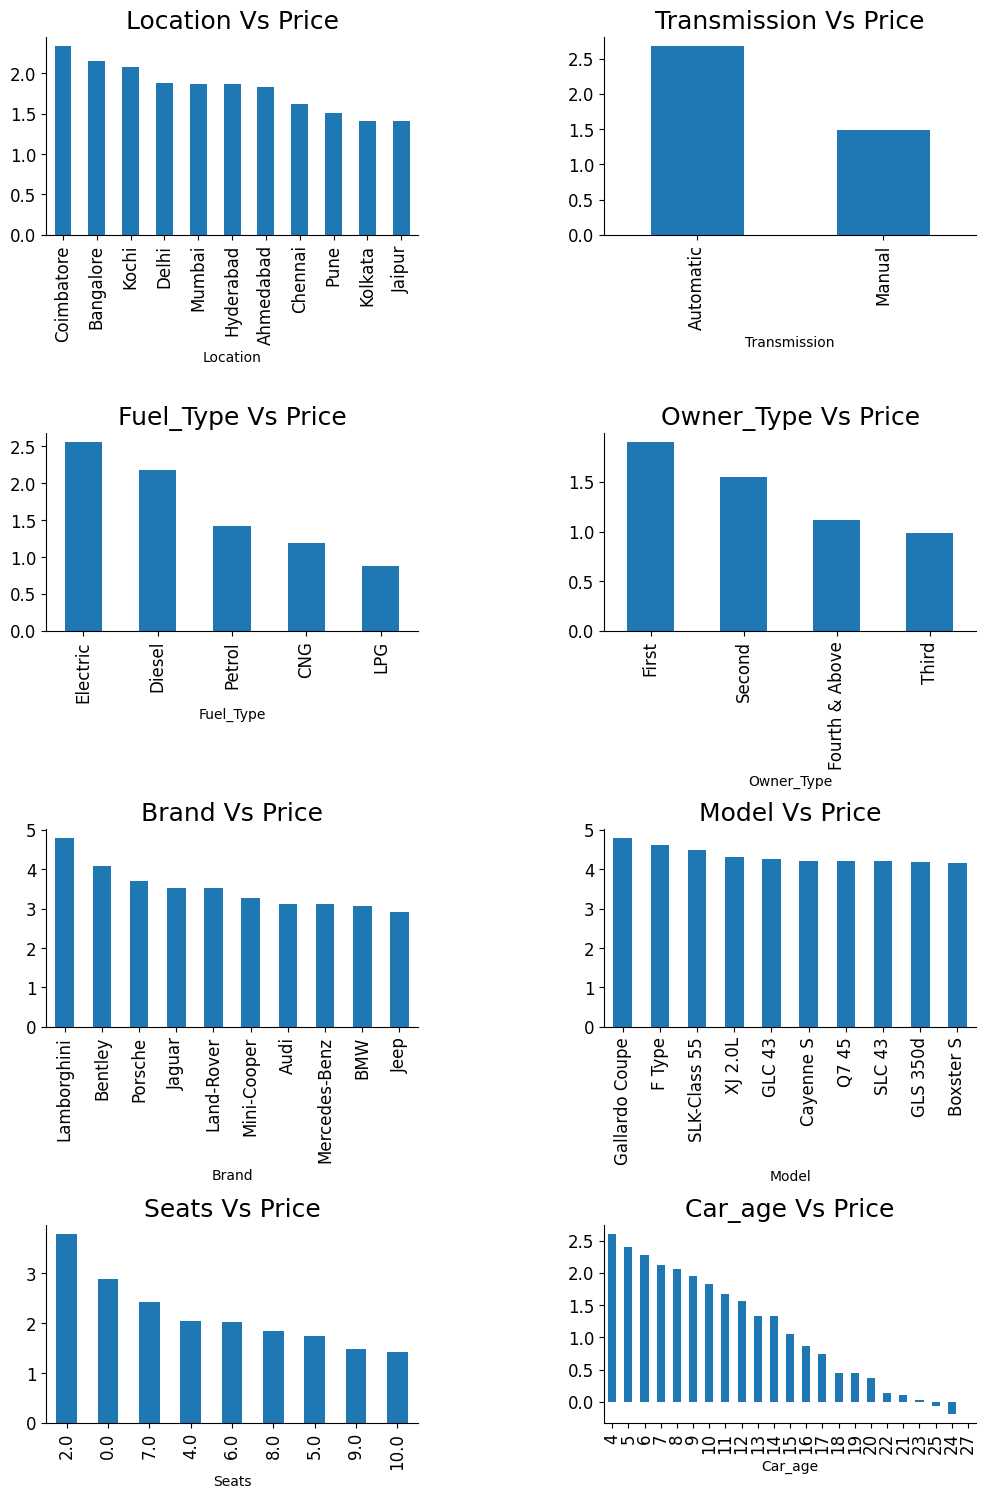

In [33]:
#bar plots for categorical varialbes
fig, axarr = plt.subplots(4,2, figsize=(12,18))

dataset.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Location Vs Price", fontsize=18)
dataset.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
dataset.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Fuel_Type Vs Price", fontsize=18)
dataset.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Owner_Type Vs Price", fontsize=18)
dataset.groupby('Brand')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Brand Vs Price", fontsize=18)
dataset.groupby('Model')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Model Vs Price", fontsize=18)
dataset.groupby('Seats')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Seats Vs Price", fontsize=18)
dataset.groupby('Car_age')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Car_age Vs Price", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

* The price of cars is high in coimbatore while Jaipur has lowest
* Automatic cars have more price than manual cars
* Electric cars have highest price while LPG have lowest
* 2 seater cars have highest price

* ### Multivariate Analysis

<AxesSubplot: >

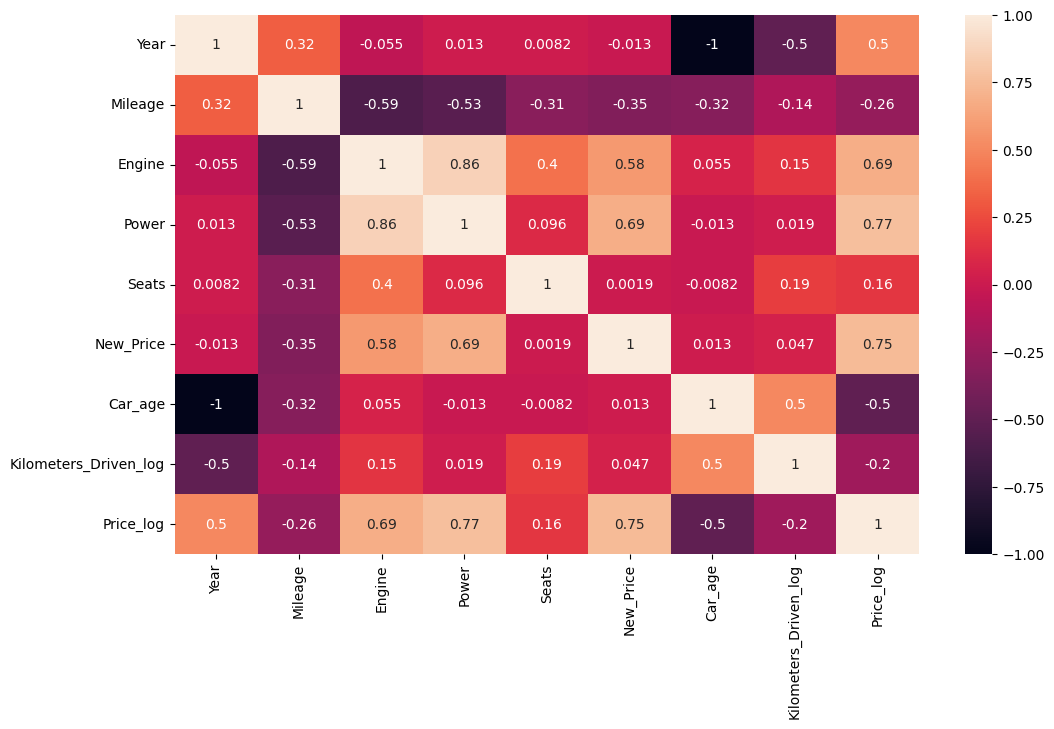

In [34]:
#heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(dataset.drop(['Kilometers_Driven', 'Price'], axis=1).corr(numeric_only=True), annot=True, vmin=-1, vmax=1)

* Year is positively correlated with price
* Mileage is negatively correlated with engine and power
* Engine has strong positive correlation to power
* Kilometer_Driven has not much impact on price